<a href="https://colab.research.google.com/github/jihansand/StudyCase01-Komputasi-Statistik-SVD-Topic-Modelling/blob/main/Latihan_1_Kelompok_3_Kompstat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tugas 1 Komputasi Statistika**
### **Nama anggota kelompok:**
1. Andri Naufal Al'Afif 2106725085 - Visualisasi
2. Christian Audy Samuel Tampubolon 2106725103 - Module & Data
3. Fernaldy 2106706464 - Pre-Processing
4. Jefta Adriel Heryadi 2106638671 - Topic Modelling
5. Jihan Sandrina Halim 2106708160 - Penjelasan & Kesimpulan

#**Case Study**
*The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.*
Bagaimana kita tahu topik apa yang dibicarakan dalam dokumen 20 Newsgroups tersebut?

##**Module & Data**

In [ ]:
# Import modules yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option("display.max_colwidth", 200)

import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

In [ ]:
#Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

In [ ]:
# Load data yang akan diolah
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
# Melihat 5 data awal
documents[:5]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
# Mengubah bentuk data dari list menjadi dataframe untuk memudahkan pengolahan
doc = pd.DataFrame({'document':documents})
doc

,document
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n..."
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti..."
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca..."
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ..."
...,...
11309,"Danny Rubenstein, an Israeli journalist, will be speaking tonight \n(Wednesday, 7:30 pm) on the messy subject of politics in Israel.\nHe is speaking at Hillel on the U.C. Berkeley campus. The tal..."
11310,\n
11311,\nI agree. Home runs off Clemens are always memorable. Kinda like\neclipses and hurricanes. They don't happen very often.
11312,"I used HP DeskJet with Orange Micros Grappler LS on System6.0.5.\n\nBut now I update system 6.0.5 to System7 with Kanji-Talk 7.1,\nthen I can not print by my DeskJet.\n\nIs the Grappler LS old ?\n..."


In [ ]:
# Melihat 5 isi data awal
doc[:5]

,document
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n..."
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti..."
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca..."
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ..."


In [ ]:
# Melihat banyaknya data
print("Total Documents: ", len(documents))

Total Documents:  11314


Data yang akan digunakan adalah data teks dari 20 Newsgroup yang berjumlah 11.314 baris

## **Preprocessing**

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#Menghapus segalanya kecuali letter dan space
doc['clean_doc'] = doc['document'].str.replace("[^a-zA-Z#]", " ")

#Menghapus kata yg berjumlah dibawah 3, berguna untuk to be
doc['clean_doc'] = doc['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Menggantikan semua huruf ke huruf kecil
doc['clean_doc'] = doc['clean_doc'].apply(lambda x: x.lower())

In [ ]:
tokenized_doc = doc['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

detokenized_doc = []
for i in range(len(doc)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

doc['clean_doc'] = detokenized_doc

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, #Keep top 1000 terms
max_df = 0.5,
smooth_idf=True)

X = vectorizer.fit_transform(doc['clean_doc'])

X.shape #check shape of the document-ter

(11314, 1000)

In [ ]:
#Berikut words/vocabulary yang terdapat pada matrix 20 news data sebelum dilakukan svd
print(vectorizer.vocabulary_)

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'having': 392, 'europe': 294, 'realize': 713, 'described': 231, 'letter': 480, 'think': 896, 'reason': 714, 'report': 732, 'clearly': 154, 'reports': 734, 'soldiers': 817, 'received': 718, 'government': 370, 'makes': 518, 'away': 73, 'look': 500, 'jews': 448, 'power': 667, 'yeah': 995, 'expect': 304, 'people': 630, 'read': 709, 'actually': 9, 'accept': 2, 'hard': 389, 'atheism': 64, 'need': 579, 'little': 492, 'faith': 314, 'logic': 497, 'runs': 758, 'sorry': 821, 'maybe': 530, 'start': 839, 'newsgroup': 584, 'forget': 340, 'points': 652, 'like': 486, 'know': 461, 'question': 702, 'sort': 822, 'arab': 46, 'countries': 203, 'want': 951, 'continue': 191, 'israel': 441, 'stop': 851, 'asking': 61, 'questions': 703, 'work': 981, 'begin': 81, 'attack': 66, 'group': 376, 'stupid': 859, 'center': 124, 'policy': 654, 'research': 739, 'change': 128, 'product': 686, 'area': 48, 'suspect': 872, 'clipper': 156

Pada Preprocessing, kami menghapus huruf dan kata yang tidak bermakna atau berisi informasi yang berguna dengan tokenisasi. Lalu, didapat kata-kata yang sering disebutkan di data.

## **Topic Modelling**

In [ ]:
# Karena data berasal dari 20 Newsgroup, kita set 20 topics (bisa dilihat n_components=20)
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
# 7 Kata-kata yang paling penting di tiap topics
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
#melakukan vektorisasi dari terms
vectorizer.fit_transform(terms)

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [ ]:
# Words/vocab yang ada pada data sesudah dilakukan SVD
print(str(vectorizer.vocabulary_))

{'ability': 0, 'able': 1, 'accept': 2, 'access': 3, 'according': 4, 'account': 5, 'action': 6, 'actions': 7, 'actual': 8, 'actually': 9, 'added': 10, 'addition': 11, 'additional': 12, 'address': 13, 'administration': 14, 'advance': 15, 'advice': 16, 'agencies': 17, 'agree': 18, 'algorithm': 19, 'allow': 20, 'allowed': 21, 'allows': 22, 'amendment': 23, 'america': 24, 'american': 25, 'americans': 26, 'analysis': 27, 'angeles': 28, 'anonymous': 29, 'answer': 30, 'answers': 31, 'anti': 32, 'anybody': 33, 'apparently': 34, 'appear': 35, 'appears': 36, 'apple': 37, 'application': 38, 'applications': 39, 'apply': 40, 'appreciate': 41, 'appreciated': 42, 'approach': 43, 'appropriate': 44, 'april': 45, 'arab': 46, 'archive': 47, 'area': 48, 'areas': 49, 'aren': 50, 'argument': 51, 'arguments': 52, 'armenia': 53, 'armenian': 54, 'armenians': 55, 'arms': 56, 'army': 57, 'article': 58, 'articles': 59, 'asked': 60, 'asking': 61, 'assume': 62, 'assuming': 63, 'atheism': 64, 'atheists': 65, 'attack'

Pada topic modeling, kami melakukan SVD untuk melihat masing-masing kecenderungan topik yang dibicarakan dari 20 Newsgroup.

## **Visualisasi**

In [ ]:
# Visualisasi dengan t-SNE
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)

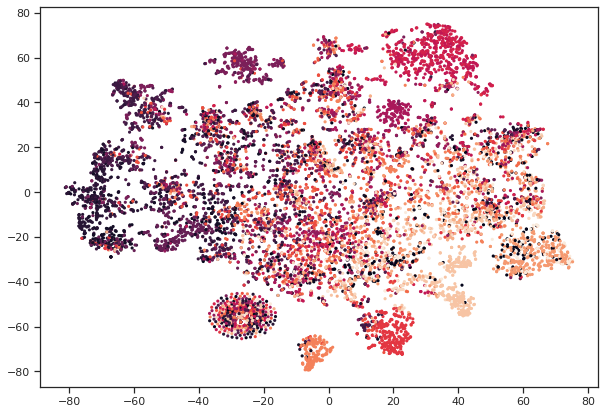

In [ ]:
# Plotting data
plt.figure(figsize=(10,7))
plt.scatter(embedding[:, 0], embedding[:, 1],
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

Dari plot di atas, dapat dilihat data membentuk beberapa klaster dimana tiap warna mewakilkan 20 Newsgroup. Bisa disimpulkan ada Newsgroup yang cenderung membicarakan satu topik tertentu, ada Newsgroup yang membicarakan beberapa topik, dan ada pula topik tertentu yang paling sering dibicarakan oleh 20 Newsgroup tersebut.

## **Kesimpulan**

Dari proses yang dilakukan, kami mendapat


1.   Kata-kata yang sering muncul (sering dibicarakan) pada 20 Newsgroup tersebut.
2.   Topik-topik yang dibicarakan 20 Newsgroup tersebut

      Topic 1: like know people think good time thanks = topik sosial   
Topic 2: thanks windows card drive mail file advance = topik teknologi   
Topic 3: game team year games season players good = topik olahraga   
Topic 4: drive scsi hard disk card drives problem = topik komputer   
Topic 5: windows file window files program problem version = topik keamanan data   
Topic 6: government space chip mail information data encryption = topik teknologi  
Topic 7: like bike chip sounds know looks look = topik penjualan  
Topic 8: card sale video monitor offer price jesus = topik barang elektronik  
Topic 9: know card chip video government people clipper = topik keamanan data  
Topic 10: good know time bike problem jesus work = topik keamanan data  
Topic 11: think good chip clipper need encryption people = topik politik  
Topic 12: thanks problem right bike good window time = topik penjualan  
Topic 13: good people windows know sale file files = topik penjualan  
Topic 14: space think know nasa problem year israel = topik luar angkasa  
Topic 15: space good card thanks people year nasa = topik luar angkasa  
Topic 16: people problem game window time work want = topik sosial  
Topic 17: problem good window israel people know israeli = topik politik  
Topic 18: file time problem need files mail game = topik teknologi  
Topic 19: need right file card files want good = topik teknologi  
Topic 20: need time windows want israel window israeli = topik teknologi  
3.   Visualisasi yang menggambarkan bahwa data membentuk beberapa klaster tertentu

Sehingga, kami menyimpulkan bahwa bahasan 20 Newsgroup tersebut sangat beragam. Ada topik tertentu yang dibahas oleh semua Newsgroup, ada Newsgroup yang cenderung membahas satu topik yang sama, dan ada pula Newsgroup yang membicarakan beberapa topik yang berbeda-beda.